In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\krunal sheth\Downloads\telemonitoring_parkinsons_updrs.data.csv')
df.head(3)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014


In [3]:
df.shape

(5875, 22)

In [4]:
df.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [8]:
df['subject#'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [9]:
df['sex'].unique()

array([0, 1], dtype=int64)

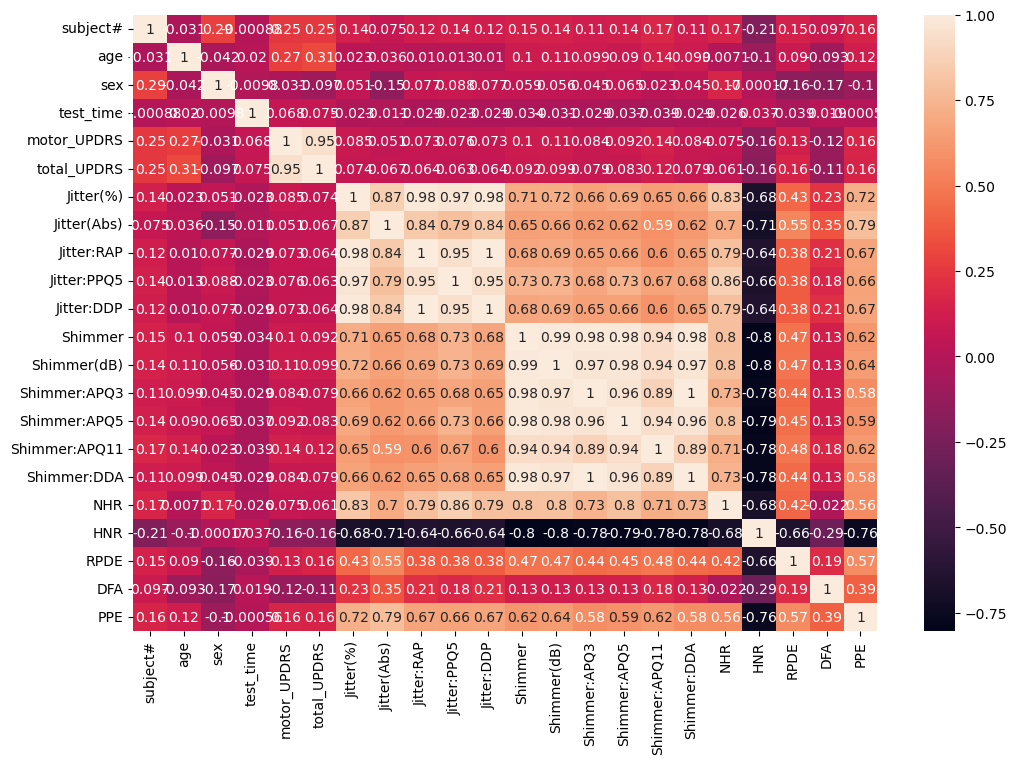

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

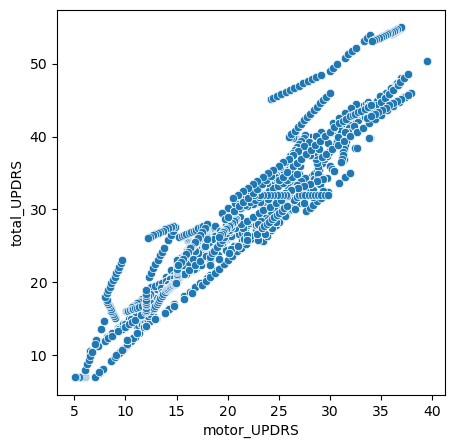

In [17]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df, x = 'motor_UPDRS',y = 'total_UPDRS')
plt.show()

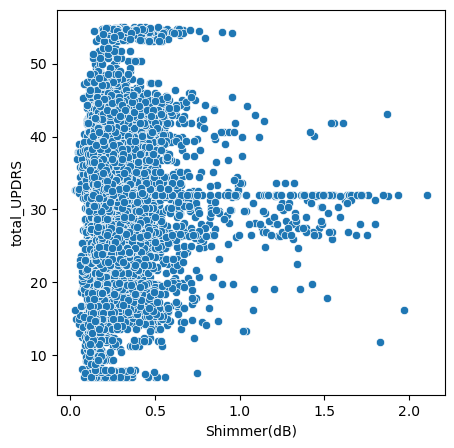

In [22]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df, x = 'Shimmer(dB)',y = 'total_UPDRS')
plt.show()

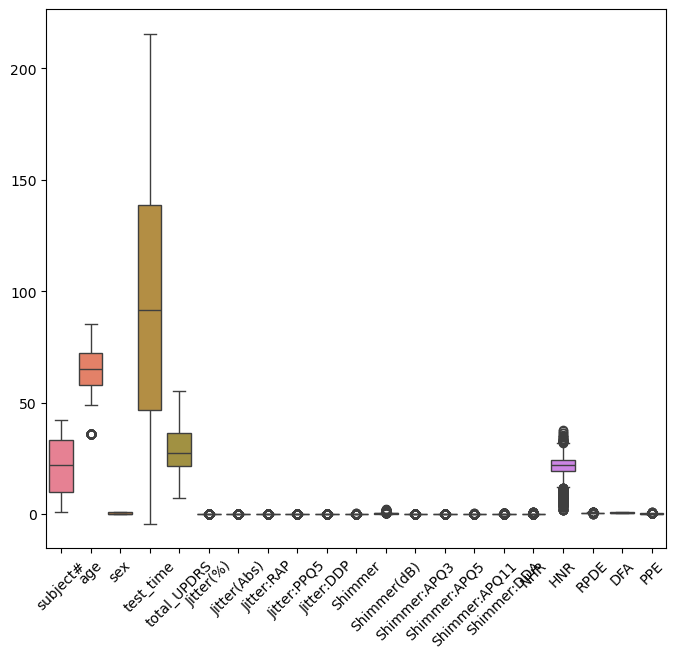

In [109]:
plt.figure(figsize = (8,7))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

In [24]:
df.drop(['motor_UPDRS'],axis = 1, inplace = True)

In [26]:
df.head(3)

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014


In [33]:
y = df['total_UPDRS']
x = df.drop(['total_UPDRS'],axis = 1)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_train

array([[-0.21603188, -1.1127035 , -0.67840053, ...,  0.1779723 ,
         1.23888871,  0.95846763],
       [-0.1347506 ,  0.25763223, -0.67840053, ..., -0.76615048,
         1.80977613,  0.41926171],
       [-1.5165323 , -0.88431421, -0.67840053, ...,  0.0841958 ,
        -0.85158956,  1.04740316],
       ...,
       [ 1.32831238,  0.25763223, -0.67840053, ...,  0.07008959,
        -0.95362951, -0.41646909],
       [ 1.40959366,  0.14343758, -0.67840053, ...,  0.74867784,
        -0.77086085, -0.16512478],
       [-1.27268847, -0.19914635, -0.67840053, ...,  0.11906397,
         0.01186886,  0.24248726]])

In [39]:
x_scaled_test = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(x_scaled_train,y_train)

LinearRegression()

In [45]:
# prediction 

In [48]:
x.iloc[:1]

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006


In [53]:
pre = scaler.transform(x.iloc[:1])
pre

array([[-1.67909486,  0.82860544, -0.67840053, -1.63474911,  0.08544352,
        -0.28735325,  0.33861501, -0.02639018,  0.33969846, -0.31870559,
        -0.34512045, -0.20269842, -0.41582401, -0.54665237, -0.20269416,
        -0.29820278, -0.01026367, -1.22380764, -1.48598733, -0.65180281]])

In [54]:
lr.predict([[-1.67909486,  0.82860544, -0.67840053, -1.63474911,  0.08544352,
        -0.28735325,  0.33861501, -0.02639018,  0.33969846, -0.31870559,
        -0.34512045, -0.20269842, -0.41582401, -0.54665237, -0.20269416,
        -0.29820278, -0.01026367, -1.22380764, -1.48598733, -0.65180281]])

array([30.38231408])

In [60]:
x.iloc[2:3]

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
2,1,72,0,19.681,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.02022,23.047,0.46222,0.54405,0.21014


In [61]:
pre1 = scaler.transform(x.iloc[2:3])
pre1

array([[-1.67909486,  0.82860544, -0.67840053, -1.3718862 , -0.2405134 ,
        -0.54482379, -0.30436889, -0.32717308, -0.30329107, -0.66363702,
        -0.55839727, -0.73109538, -0.69319688, -0.65130649, -0.73108889,
        -0.19808089,  0.31740818, -0.79327017, -1.54766293, -0.10261769]])

In [62]:
lr.predict([[-1.67909486,  0.82860544, -0.67840053, -1.3718862 , -0.2405134 ,
        -0.54482379, -0.30436889, -0.32717308, -0.30329107, -0.66363702,
        -0.55839727, -0.73109538, -0.69319688, -0.65130649, -0.73108889,
        -0.19808089,  0.31740818, -0.79327017, -1.54766293, -0.10261769]])

array([30.10686397])

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_scaled_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 7.569266248290794
MSE: 84.95800061950752
R2 score: 0.24468533915855528


# Decision Tree 

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
regressor = DecisionTreeRegressor()

In [70]:
regressor.fit(x_scaled_train,y_train)

DecisionTreeRegressor()

In [71]:
y_pred = regressor.predict(x_scaled_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 0.16986659103800358
MSE: 0.8684444282586499
R2 score: 0.9922791402339192


In [103]:
print("Train R²:", regressor.score(x_scaled_train, y_train))
print("Test R²:", regressor.score(x_scaled_test, y_test))

Train R²: 1.0
Test R²: 0.9922791402339192


# SVM

In [100]:
from sklearn.svm import SVR
classifier = SVR(kernel='rbf', C=100, epsilon=10)

In [101]:
classifier.fit(x_scaled_train,y_train)

SVR(C=100, epsilon=10)

In [102]:
y_pred = classifier.predict(x_scaled_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 5.7930718896692
MSE: 44.87556750978561
R2 score: 0.6010361142380947
